<h1>Dogs-cats prediction using CNN/Transferlearing </h1>

<h5>Rashmith Reddy Boppidi</h5>

In [1]:
import os
from imageio import imread
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout,Activation
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.losses import binary_crossentropy
from keras.losses import *
from keras.preprocessing.image import ImageDataGenerator, load_img
import glob
from numpy import asarray
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

<h2> We can preprocess the data using <i>ImageDataGenerator</i> and also using <i>opencv</i></h2>
 <p> first for training puprose we will use ImageDataGenerator, while predicting from test directory we will see opencv. </p>

In [5]:
file = os.listdir('train')
label = [i.split(".")[0] for i in file]

In [6]:
train1 = pd.DataFrame({'images':file,'labels':label})

In [7]:
train1.head()

,images,labels
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [8]:
x_train, x_test = train_test_split(train1, test_size=0.3)

In [9]:
datagen= ImageDataGenerator(
         rescale=1./255,
         shear_range=0.2,
         zoom_range=0.2,
       horizontal_flip=True, )
    
train_gen = datagen.flow_from_dataframe(
    x_train, 
    'train', 
    x_col='images',
    y_col='labels',
    batch_size=50,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(125,125)
)

Found 17500 validated image filenames belonging to 2 classes.


In [10]:
validgen = ImageDataGenerator(rescale=1./255.)
test_gen = validgen.flow_from_dataframe(
    x_test, 
    'train', 
    x_col='images',
    y_col='labels',
    batch_size=50,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    arget_size=(125,125))

Found 7500 validated image filenames belonging to 2 classes.


# we can create a CNN  model and train it .We can also use transfer learning, adding layer to pretrained model or just use it.

In [137]:
model2 =Sequential()
model2.add(Conv2D(16,(4,4),  activation='relu', input_shape=(125,125,3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


model2.summary()
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])
history1 = model2.fit(train_gen,epochs=5,steps_per_epoch=5)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 122, 122, 16)      784       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 59536)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 476296    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 477,089
Trainable params: 477,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
5/5 [==============================] - 3s 662ms/step - loss: 3.5956 - accuracy: 0.5000
Epoch 2/5
5/5 [=

# now lets see transfer learning , we have added last two layers
<h5> In Dense layer we had used sigmoid as the probalitty lies from 1 to 0 </h5>

In [26]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D

model1=MobileNetV2((125,125,3),include_top=False, weights='imagenet')
model1.trainable = False
model = Sequential([
  model1,
  GlobalAveragePooling2D(),
  Dense(2, activation='sigmoid')
])

In [27]:
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
s_epoch=train_gen.n//train_gen.batch_size
v_steps=test_gen.n//test_gen.batch_size
history = model.fit_generator(generator=train_gen,
                    steps_per_epoch=20,
                    validation_data=test_gen,
                    validation_steps=20,
                    epochs=10)

Epoch 1/10
20/20 [==============================] - 61s 3s/step - loss: 0.8176 - accuracy: 0.5278 - val_loss: 0.6608 - val_accuracy: 0.6130
Epoch 2/10
20/20 [==============================] - 62s 3s/step - loss: 0.7001 - accuracy: 0.6186 - val_loss: 0.6096 - val_accuracy: 0.7380
Epoch 3/10
20/20 [==============================] - 65s 3s/step - loss: 0.5718 - accuracy: 0.7206 - val_loss: 0.5542 - val_accuracy: 0.8300
Epoch 4/10
20/20 [==============================] - 67s 3s/step - loss: 0.4623 - accuracy: 0.8111 - val_loss: 0.4905 - val_accuracy: 0.8970
Epoch 5/10
20/20 [==============================] - 60s 3s/step - loss: 0.4048 - accuracy: 0.8163 - val_loss: 0.4515 - val_accuracy: 0.9170
Epoch 6/10
20/20 [==============================] - 63s 3s/step - loss: 0.3193 - accuracy: 0.8591 - val_loss: 0.4132 - val_accuracy: 0.9210
Epoch 7/10
20/20 [==============================] - 65s 3s/step - loss: 0.3419 - accuracy: 0.8476 - val_loss: 0.3831 - val_accuracy: 0.9360
Epoch 8/10
20/20 [==

# Training and validation accuracy

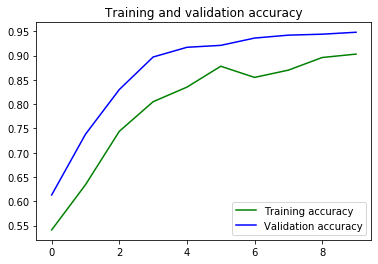

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

# Time for classification from test directory

In [68]:
im3=[]
for i in glob.glob('test1/*.jpg'):
    im = cv2.imread(i)
    im2 = cv2.resize(im,(125,125))
    im3.append(im2)



In [69]:
im3 = np.array(im3)
im3  = im3.astype(float)
im3 = im3/255.0

In [70]:
predictions = model.predict_classes(im3)

In [71]:
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [73]:
predicted_labels = []
for i in predictions:
    if i == 1:
        k='dog'
        predicted_labels.append(k)
    if i == 0:
        k = 'cat'
        predicted_labels.append(k)
        
    

In [79]:
file0 = os.listdir('test1')

predecition = pd.DataFrame({"file_name":file0,'labels_predicted':predictions,"predicted_labels":predicted_labels})

In [80]:
predecition.head(4)

,file_name,labels_predicted,predicted_labels
0,1.jpg,1,dog
1,10.jpg,0,cat
2,100.jpg,1,dog
3,1000.jpg,1,dog


In [93]:
import matplotlib.pyplot as plt

k = predecition.head(4)
c=0

path=[]
for i in k['file_name']:
    paths=os.path.join('test1/',i)
    path.append(paths)
    



# Results

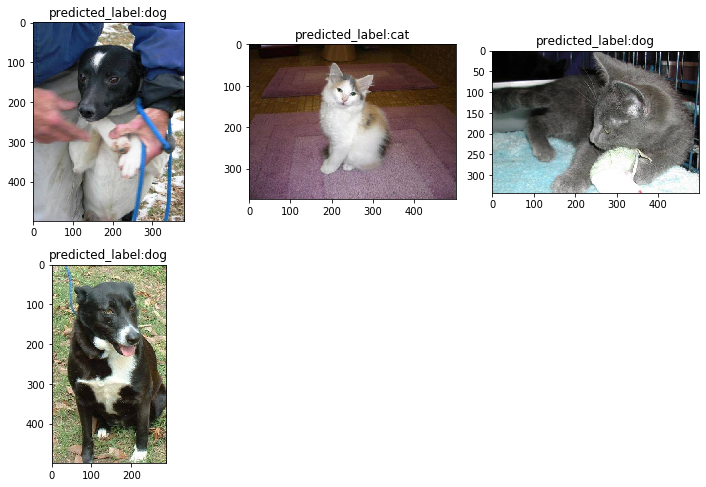

In [115]:
import matplotlib.image as mpimg
c=0
plt.figure(figsize=(10,10))
while c<4:
    im = mpimg.imread(path[c])
    k=plt.subplot(3,3,c+1)
    k.imshow(im)
    plt.title(f"predicted_label:{predecition['predicted_labels'][c]}")
    c=c+1
plt.tight_layout()
plt.show()   